<a href="https://colab.research.google.com/github/hwan2-99/machine_learning_subject/blob/main/CNN_Mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 CNN을 적용한 Mnist 손글씨 인식 모델 - 네트워크 구조 변경

seed값 설정 및 데이터 불러오기

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11490434/11490434 [==============================] - 0s 0us/step


컨볼루션 신경망 설정
더 깊거나 넓은 CNN 모델을 사용 - 더 많은 합성곱 층을 추가하고 더 많은 뉴런을 포함하는 밀집 층

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))  # 추가된 합성곱 층
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # 더 넓은 밀집 층
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 최적화 설정

In [3]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

모델의 실행

In [4]:
history = model.fit(X_train, Y_train, validation_data=(X_test , Y_test), epochs=30, batch_size = 200, verbose = 0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.04561, saving model to ./model/01-0.0456.hdf5

Epoch 2: val_loss improved from 0.04561 to 0.03481, saving model to ./model/02-0.0348.hdf5

Epoch 3: val_loss improved from 0.03481 to 0.02827, saving model to ./model/03-0.0283.hdf5

Epoch 4: val_loss improved from 0.02827 to 0.02130, saving model to ./model/04-0.0213.hdf5

Epoch 5: val_loss improved from 0.02130 to 0.02068, saving model to ./model/05-0.0207.hdf5

Epoch 6: val_loss improved from 0.02068 to 0.02025, saving model to ./model/06-0.0202.hdf5

Epoch 7: val_loss improved from 0.02025 to 0.01878, saving model to ./model/07-0.0188.hdf5

Epoch 8: val_loss did not improve from 0.01878

Epoch 9: val_loss improved from 0.01878 to 0.01732, saving model to ./model/09-0.0173.hdf5

Epoch 10: val_loss did not improve from 0.01732

Epoch 11: val_loss did not improve from 0.01732

Epoch 12: val_loss did not improve from 0.01732

Epoch 13: val_loss improved from 0.01732 to 0.01686, saving model to ./m

테스트 정확도 출력

In [5]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9954

 Test Accuracy: 0.9954


인식 정확도 = 99.54%

오차 그래프로 출력

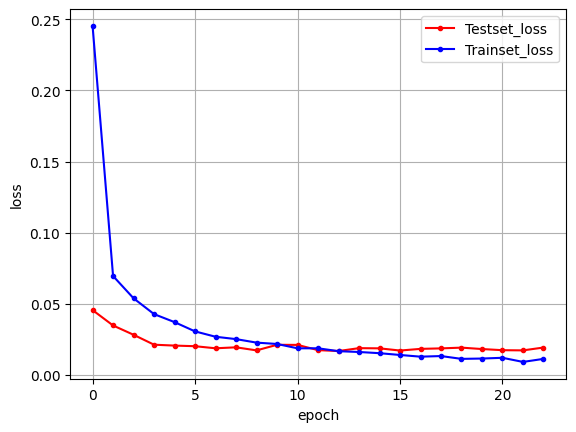

In [6]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c="red", label='Testset_loss')
plt.plot(x_len,y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()